#### ***Import Dependencies & Load Dataset***

In [249]:
import pandas as pd          
import numpy as np                  
import seaborn as sns          
import matplotlib.pyplot as plt     
import warnings 
warnings.filterwarnings('ignore')     

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('fivethirtyeight')

In [250]:
jobs=pd.read_parquet('job_dataset.gzip')

#### ***Data Understanding***

*i) Brief Summary Information about the Data*

In [251]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

*ii) Brief Descriptive Statistics about the Data*

In [252]:
jobs.describe(include='all')

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
count,1.615940e+06,1615940,1615940,1615940,1615940,1615940,1.615940e+06,1.615940e+06,1615940,1.615940e+06,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1615940,1610462
unique,NaN,48,10,561,214,216,NaN,NaN,5,NaN,731,3,367128,1615933,147,376,16,376,11,376,375,888,884
top,NaN,5 to 8 Years,BBA,$59K-$88K,Seoul,Malta,NaN,NaN,Part-Time,NaN,2021-11-14,Male,Michael Smith,518.951.8103,UX/UI Designer,Interaction Designer,FlexJobs,Interaction Designers specialize in designing ...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Interaction design principles User behavior an...,"Work on interaction design, defining how users...",DTE Energy,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
freq,NaN,34120,162148,3043,15104,7723,NaN,NaN,324044,NaN,2378,539167,838,2,48551,20580,129879,20580,161924,20580,20580,1957,3572
mean,1.548935e+15,NaN,NaN,NaN,NaN,NaN,1.937743e+01,1.639926e+01,NaN,7.370467e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.946722e+14,NaN,NaN,NaN,NaN,NaN,2.355690e+01,7.066762e+01,NaN,3.529886e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.817948e+11,NaN,NaN,NaN,NaN,NaN,-4.090060e+01,-1.751982e+02,NaN,1.264600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.740508e+14,NaN,NaN,NaN,NaN,NaN,5.152100e+00,-1.531010e+01,NaN,4.311400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.547858e+15,NaN,NaN,NaN,NaN,NaN,1.807080e+01,1.914510e+01,NaN,7.363300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.323729e+15,NaN,NaN,NaN,NaN,NaN,3.907420e+01,4.757690e+01,NaN,1.043000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*iii) Number of Unique Values in each Column of the DataFrame*

In [253]:
jobs.nunique()

Job Id              1615940
Experience               48
Qualifications           10
Salary Range            561
location                214
Country                 216
latitude                216
longitude               216
Work Type                 5
Company Size         122188
Job Posting Date        731
Preference                3
Contact Person       367128
Contact             1615933
Job Title               147
Role                    376
Job Portal               16
Job Description         376
Benefits                 11
skills                  376
Responsibilities        375
Company                 888
Company Profile         884
dtype: int64

*iv) Number of Null Values in each Column of the DataFrame*

In [254]:
jobs.isna().sum()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

*v) Total Number of Duplicate Records*

In [255]:
jobs.duplicated().sum()

0

*vi) Head of the DataFrame*

In [256]:
jobs.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


*vii) Tail of the DataFrame*

In [257]:
jobs.tail()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,2022-05-19,Both,Shawn Cortez,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,2023-03-14,Male,Steven Diaz,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,2022-01-23,Female,Bryan Morales,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,2022-10-01,Male,Jennifer Moore,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip..."


#### ***Data Preprocessing***

*Sample the Dataset*

In [258]:
data=jobs.sample(100000,random_state=4,ignore_index=True).copy()
data.columns=data.columns.str.replace(' ','_')

***i) Experience***

*Split the column into minimum and maximum values then find the average experience*

In [259]:
data['Experience'].iloc[:2]

0    4 to 13 Years
1    5 to 13 Years
Name: Experience, dtype: object

In [260]:
data['Experience']=data['Experience'].str.replace('to','').str.replace('Years','')
data[['min_exp','max_exp']]=data['Experience'].str.split(expand=True).astype(int)

In [261]:
data['Experience']=round(np.divide((np.add(data['min_exp'],data['max_exp'])),2))

***ii) Salary Range***

*Split the column into minimum and maximum values and find the average salary*

In [262]:
data['Salary_Range']=data['Salary_Range'].str.replace('K','000').str.replace('$','')
data[['min_salary','max_salary']]=data['Salary_Range'].str.split('-',expand=True).astype(int)

In [263]:
data['Salary']=round(np.divide((np.add(data['min_salary'],data['max_salary'])),2))

***iii) Job Postings Date***

In [264]:
data['Job_Posting_Date']=pd.to_datetime(data['Job_Posting_Date'])

***iv) Latitude, Longitude & Company Size***

In [265]:
data['latitude']=data['latitude'].astype(float)
data['longitude']=data['longitude'].astype(float)
data['Company_Size']=data['Company_Size'].astype(int)

***v) Benefits***

In [266]:
data['Benefits']=data['Benefits'].str.replace('{','').str.replace('}','').str.replace("'",'')

***Preprocessed DataFrame***

In [267]:
data.columns=data.columns.str.lower()
data.rename(columns={
    'location':'city',
    'work_type':'contract_type'
    },inplace=True)

In [268]:
data=data[[
    'job_title','experience','qualifications','salary',
    'role','job_description','skills','preference','contract_type',
    'benefits','responsibilities','company','company_size','country','city','job_portal','job_posting_date']].copy()

In [269]:
data.iloc[:5]

,job_title,experience,qualifications,salary,role,job_description,skills,preference,contract_type,benefits,responsibilities,company,company_size,country,city,job_portal,job_posting_date
0,Network Engineer,8.0,MBA,75000.0,Network Administrator,Network Administrators manage an organizations...,Network management Troubleshooting Network sec...,Female,Contract,"Health Insurance, Retirement Plans, Flexible W...","Manage and maintain computer networks, trouble...",China Evergrande Group,123882,Angola,Luanda,Idealist,2023-04-03
1,Purchasing Agent,9.0,M.Com,78500.0,Inventory Manager,An Inventory Manager oversees inventory levels...,Inventory control Demand forecasting Supply ch...,Female,Part-Time,"Employee Referral Programs, Financial Counseli...","Manage inventory levels, track stock, and opti...",Metro AG,86717,"Hong Kong SAR, China",City of Victoria,Indeed,2023-08-08
2,Marketing Director,6.0,M.Tech,93500.0,Marketing Communications Director,Marketing Communications Directors manage mark...,Marketing communication Public relations Conte...,Both,Full-Time,"Legal Assistance, Bonuses and Incentive Progra...","Lead marketing communications efforts, includi...",Magellan Financial Group,23652,French Polynesia,Papeete,Jobs2Careers,2022-02-12
3,Sales Representative,8.0,B.Com,76000.0,Inside Sales Representative,Inside Sales Representatives are responsible f...,Sales prospecting and lead generation Sales pr...,Both,Part-Time,"Employee Assistance Programs (EAP), Tuition Re...","Identify and qualify sales leads, conduct sale...",Munich Re Group,22217,Honduras,Tegucigalpa,Jobs2Careers,2022-04-03
4,Sales Associate,5.0,M.Tech,79500.0,Retail Sales Associate,A Retail Sales Associate assists customers in ...,Customer service Sales techniques Product know...,Male,Intern,"Employee Referral Programs, Financial Counseli...","Assist customers in retail stores, answer ques...",Industrial and Commercial Bank of China (ICBC),20714,Pakistan,Islamabad,Internships.com,2022-07-27


In [270]:
print(f"Original Dataset : {np.product(jobs.shape):,.0f} Records\nNew Dataset : {np.product(data.shape):,.0f} Records")

Original Dataset : 37,166,620 Records
New Dataset : 1,700,000 Records


#### ***Exploratory Data Analysis***

***i) Estimates of Location***

*Mean*

In [271]:
data[['experience','salary','company_size']].mean()

experience          7.00217
salary          82498.92500
company_size    73750.22970
dtype: float64

*Trimmed Mean*

In [272]:
from scipy.stats import trim_mean
print(f"""
Experience Trimmed Mean : {trim_mean(data['experience'].sort_values(ascending=False),0.1):,.2f}
Salary Trimmed Mean : ${trim_mean(data['salary'].sort_values(ascending=False),0.1):,.2f}
Company Size Trimmed Mean : {trim_mean(data['company_size'].sort_values(ascending=False),0.1):,.2f}
      """)


Experience Trimmed Mean : 7.00
Salary Trimmed Mean : $82,497.29
Company Size Trimmed Mean : 73,750.21
      


*Weighted Mean*

In [273]:
print(f"""
Experience Weighted Mean : {np.average(data['experience'],weights=data['company_size']):,.2f}
Salary Weighted Mean : {np.average(data['salary'],weights=data['experience']):,.2f}
Company Size Weighted Mean : {np.average(data['company_size'],weights=data['experience']):,.2f}
    """)


Experience Weighted Mean : 7.00
Salary Weighted Mean : 82,491.75
Company Size Weighted Mean : 73,724.52
    


*Median*

In [274]:
data[['experience','salary','company_size']].median()

experience          7.0
salary          82500.0
company_size    73705.5
dtype: float64

*Weighted Median*

In [275]:
import wquantiles as wq 
print(f"""
Experience Weighted Median : {wq.median(data['experience'],weights=data['company_size']):,.2f} 
Salary Weighted Median : {wq.median(data['salary'],weights=data['experience']):,.2f}
Company Size Weighted Median : {wq.median(data['company_size'],weights=data['experience']):,.2f}
    """)


Experience Weighted Median : 8.00 
Salary Weighted Median : 82,500.00
Company Size Weighted Median : 73,684.17
    


***ii) Estimates of Variability/Dispersion***

*Variance*

In [276]:
data[['experience','salary','company_size']].var()

experience      2.246028e+00
salary          5.684101e+07
company_size    1.249565e+09
dtype: float64

*Standard Deviation*

In [277]:
data[['experience','salary','company_size']].std()

experience          1.498675
salary           7539.298028
company_size    35349.192740
dtype: float64

*Mean Absolute Deviation*

In [278]:
print(f"""
Experience Mean Absolute Deviation : {np.average(np.absolute(data['experience']-data['experience'].mean())):,.2f}
Salary Mean Absolute Deviation : {np.average(np.absolute(data['salary']-data['salary'].mean())):,.2f}
Company Size Mean Absolute Deviation : {np.average(np.absolute(data['company_size']-data['company_size'].mean())):,.2f}
    """)


Experience Mean Absolute Deviation : 1.25
Salary Mean Absolute Deviation : 6,473.72
Company Size Mean Absolute Deviation : 30,612.11
    


*Median Absolute Deviation*

In [279]:
print(f"""
Experience Median Absolute Deviation : {np.average(np.absolute(data['experience']-data['experience'].median())):,.2f}
Salary Median Absolute Deviation : {np.average(np.absolute(data['salary']-data['salary'].median())):,.2f}
Company Size Median Absolute Deviation : {np.average(np.absolute(data['company_size']-data['company_size'].median())):,.2f}
    """)


Experience Median Absolute Deviation : 1.25
Salary Median Absolute Deviation : 6,473.69
Company Size Median Absolute Deviation : 30,612.09
    


*Interquartile Range (IQR)*

In [290]:
cols=['experience','salary','company_size']
for index in cols:
    iqr1,iqr2=np.percentile(data[index],[75,25])
    print(f"{index} iqr : {np.subtract(iqr1,iqr2):,.2f}")

experience iqr : 2.00
salary iqr : 13,000.00
company_size iqr : 61,357.50


***Exploring Data Distribution***

*Percentiles & Boxplots*

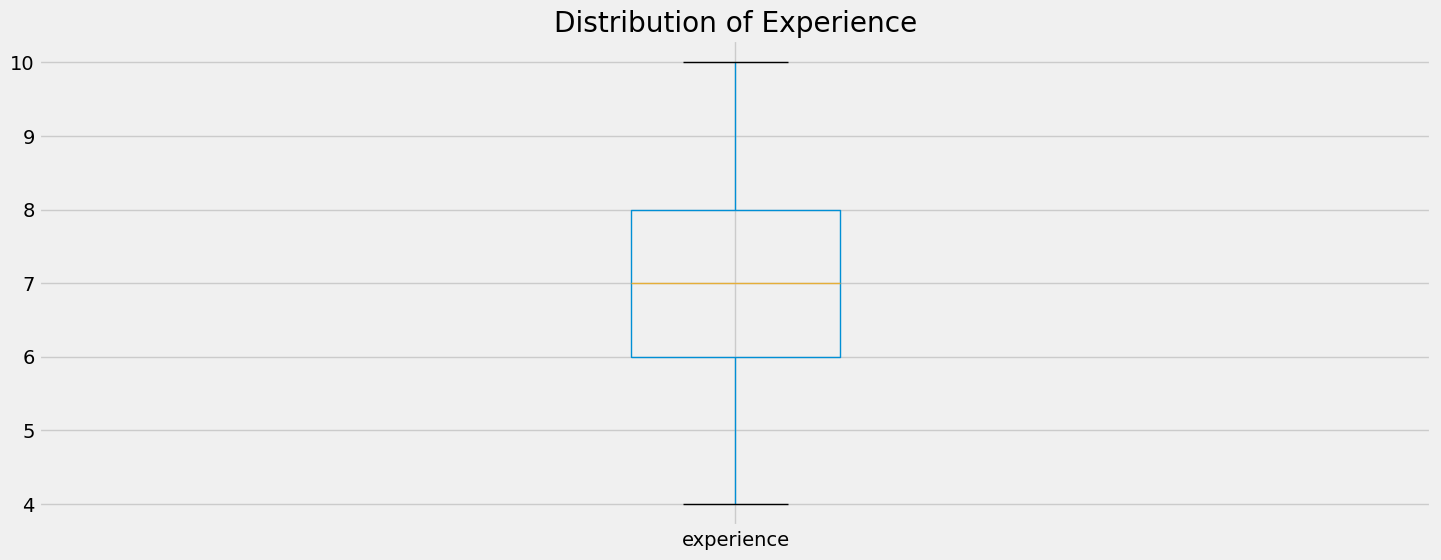

In [281]:
data.boxplot(column=['experience'],figsize=(16,6))
plt.title('Experience')
plt.show()

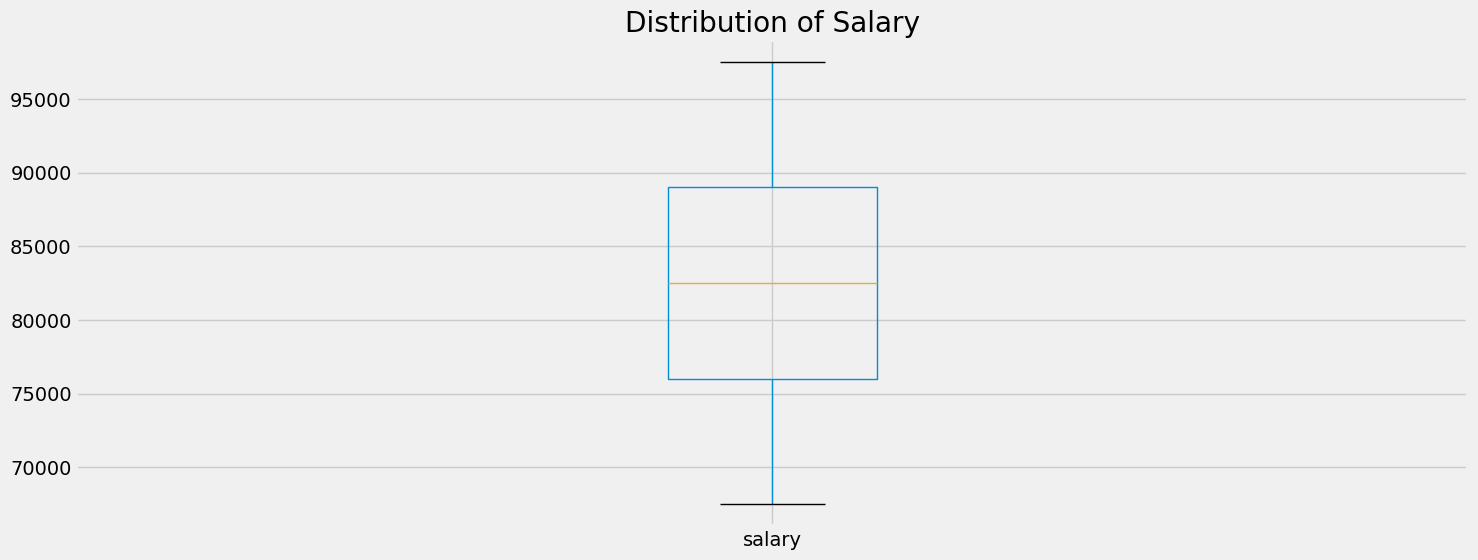

In [282]:
data.boxplot(column=['salary'],figsize=(16,6))
plt.title('Salary')
plt.show()

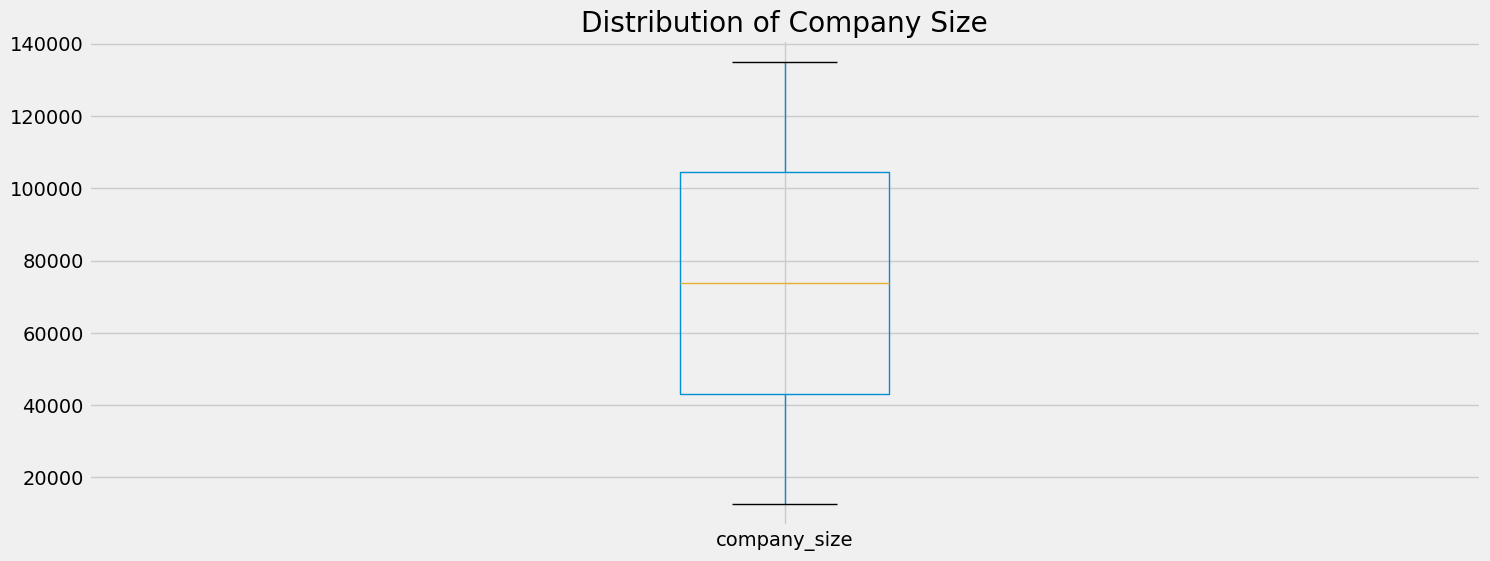

In [283]:
data.boxplot(column=['company_size'],figsize=(16,6))
plt.title('Company Size')
plt.show()

In [284]:
data[['experience','salary','company_size']].quantile([0.05,0.1,0.2,0.25,0.5,0.75,1.0])

,experience,salary,company_size
0.05,4.0,70500.0,18693.0
0.10,5.0,72500.0,24731.6
0.20,6.0,75000.0,37088.0
0.25,6.0,76000.0,43085.0
0.50,7.0,82500.0,73705.5
0.75,8.0,89000.0,104442.5
1.00,10.0,97500.0,134834.0


*Histogram & Density Plots*

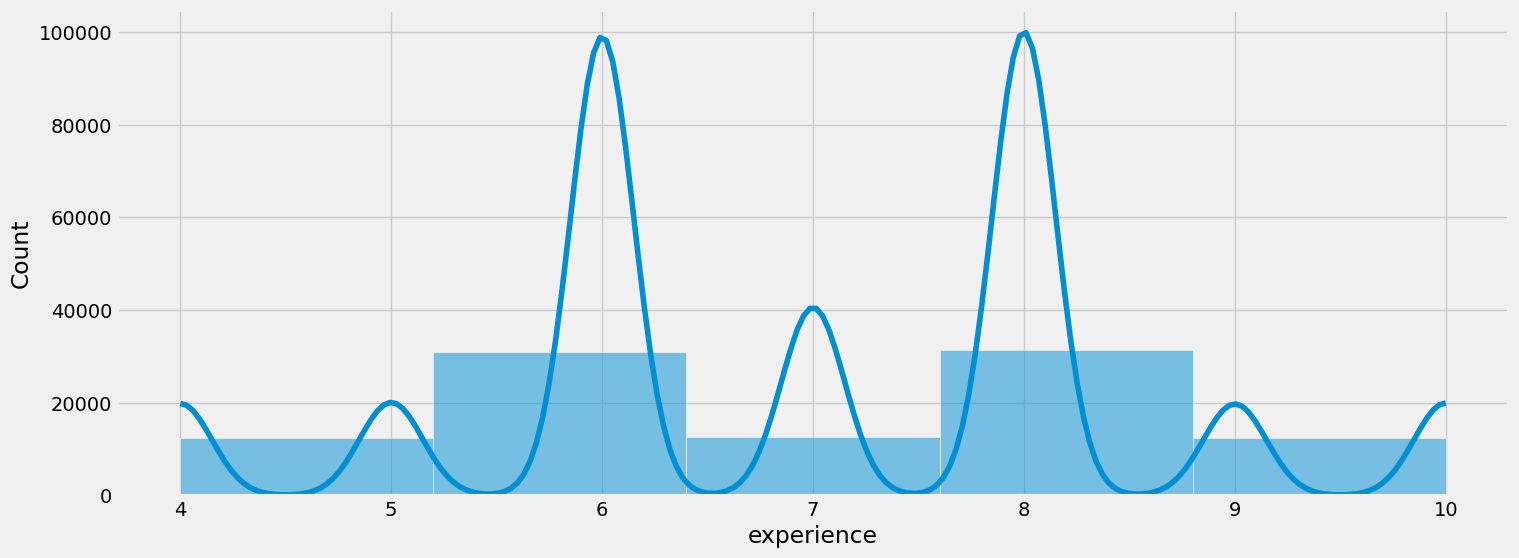

In [285]:
plt.figure(figsize=(16,6))
sns.histplot(x=data['experience'],kde=True,bins=5)
plt.title('Average Experience')
plt.show()

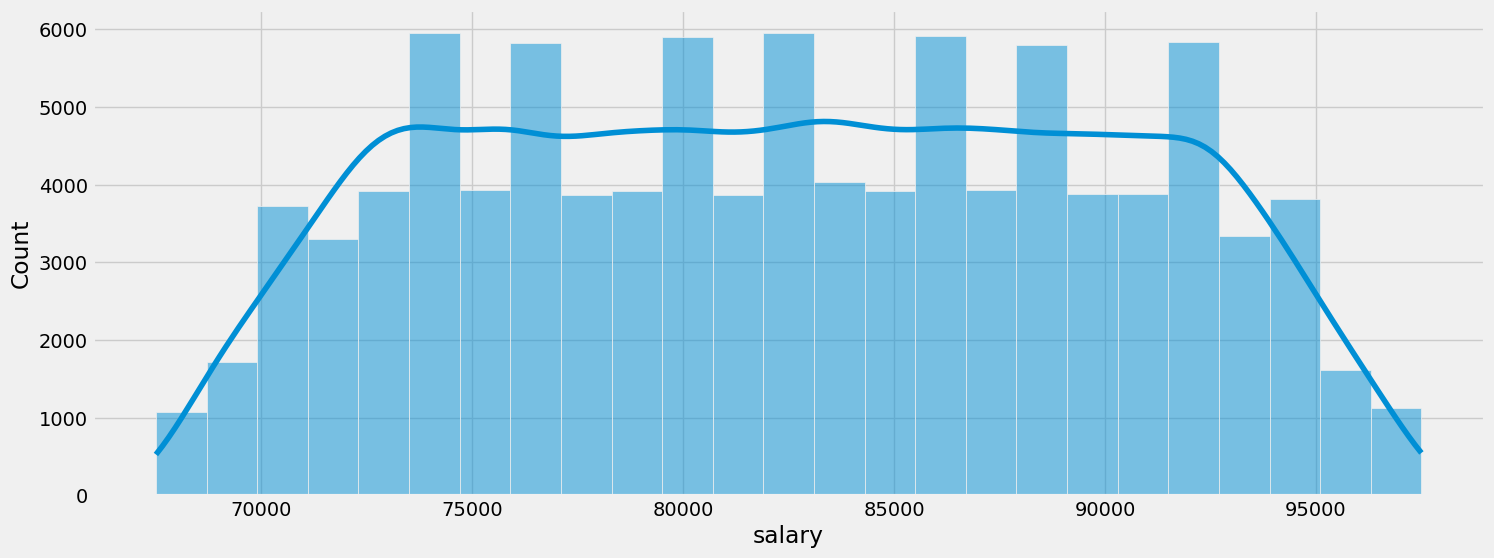

In [286]:
plt.figure(figsize=(16,6))
sns.histplot(x=data['salary'],kde=True,bins=25)
plt.title('Average Salary')
plt.show()

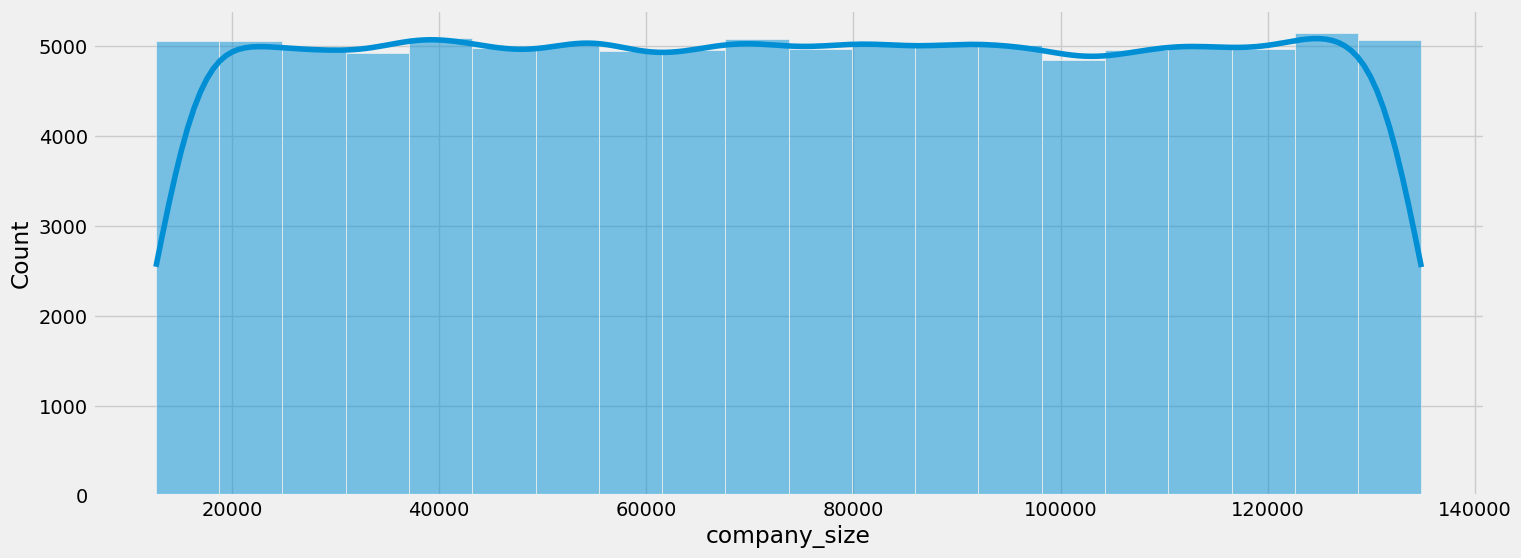

In [287]:
plt.figure(figsize=(16,6))
sns.histplot(x=data['company_size'],kde=True,bins=20)
plt.title('Average Company Size')
plt.show()

***iv) Exploring Two or More Variables***

*Bar Plots*

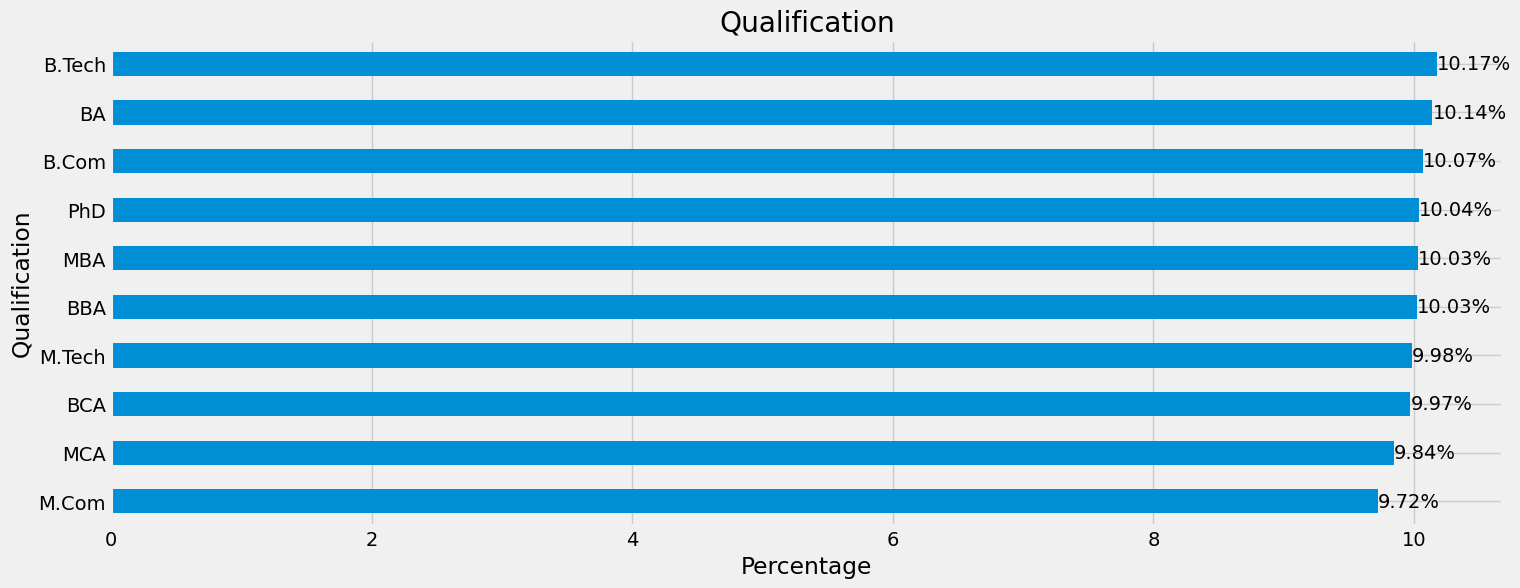

In [307]:
ax=(data['qualifications'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Qualification')
plt.xlabel('Percentage')
plt.ylabel('Qualification')
plt.show()

*Both B.Tech and B.A qualifications are more in demand compared to M.Com and MCA*

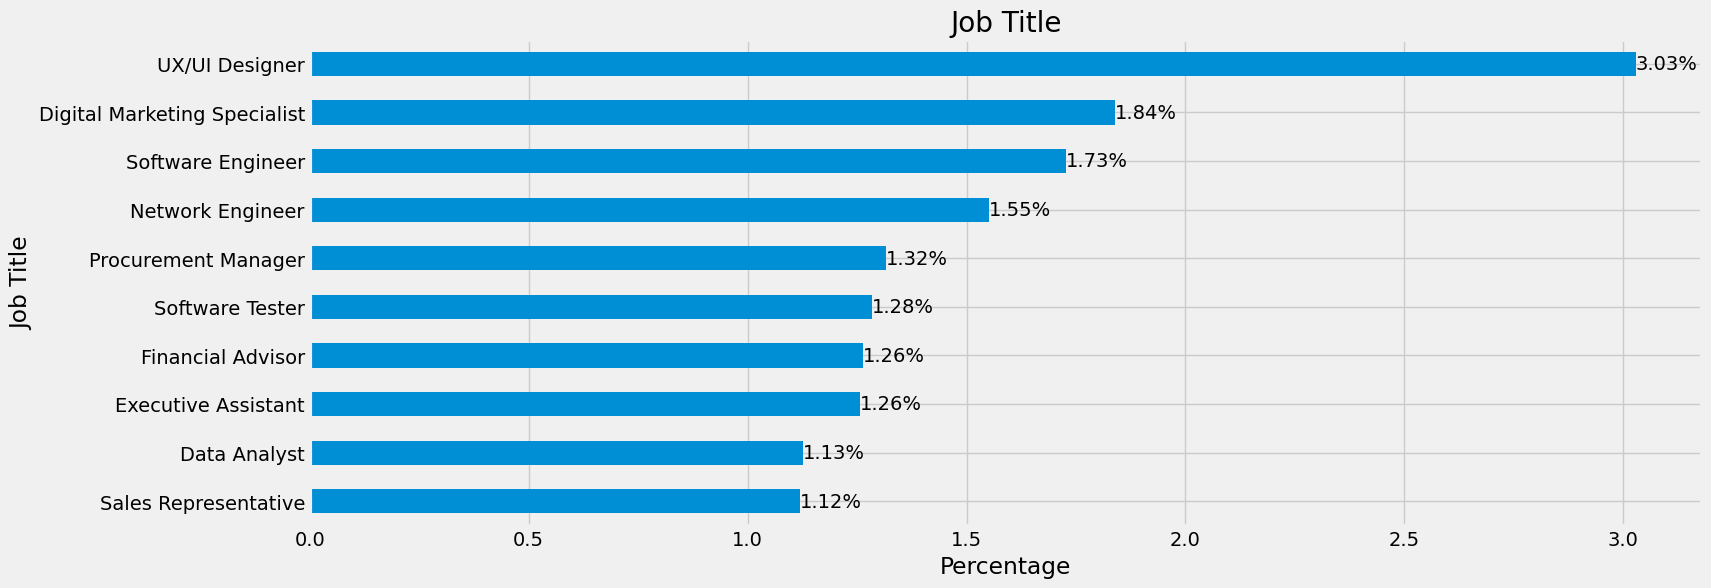

In [306]:
ax=(data['job_title'].value_counts(normalize=True).iloc[:10]*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Job Title')
plt.xlabel('Percentage')
plt.ylabel('Job Title')
plt.show()

*UX/UI Designers are currently in demand compared to Sales Representatives*

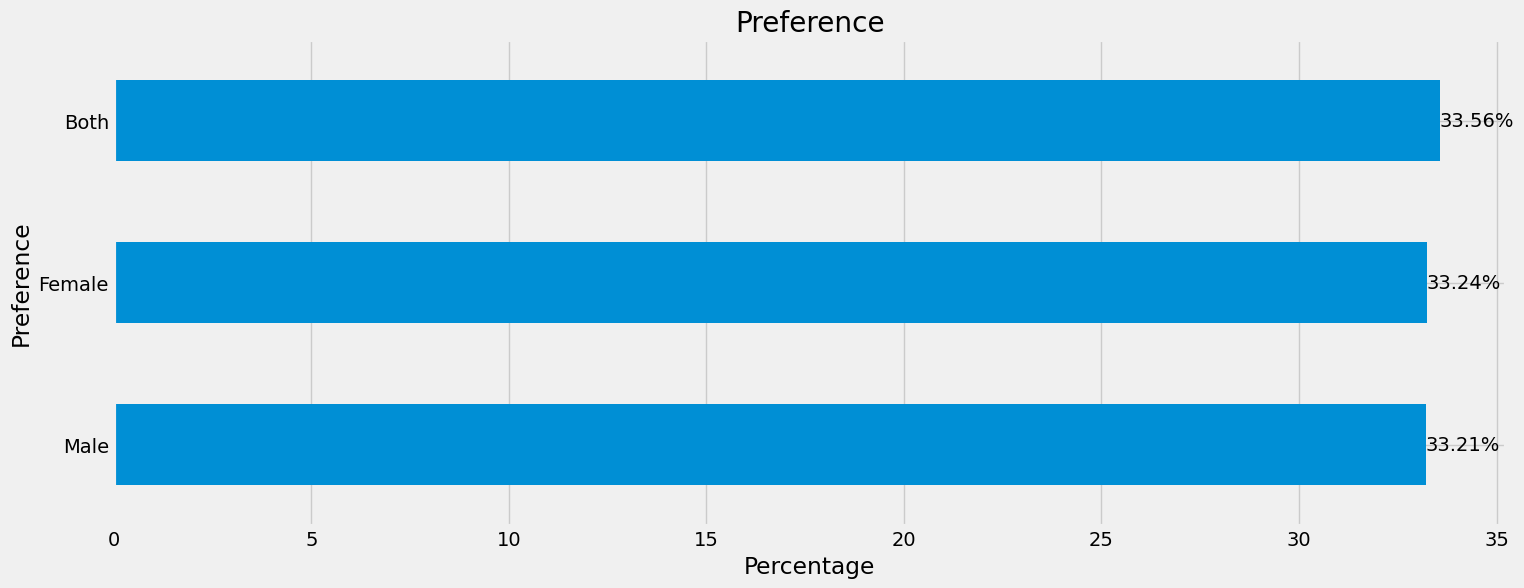

In [305]:
ax=(data['preference'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Preference')
plt.xlabel('Percentage')
plt.ylabel('Preference')
plt.show()

*A greater percentage of job postings require both gender preferences*

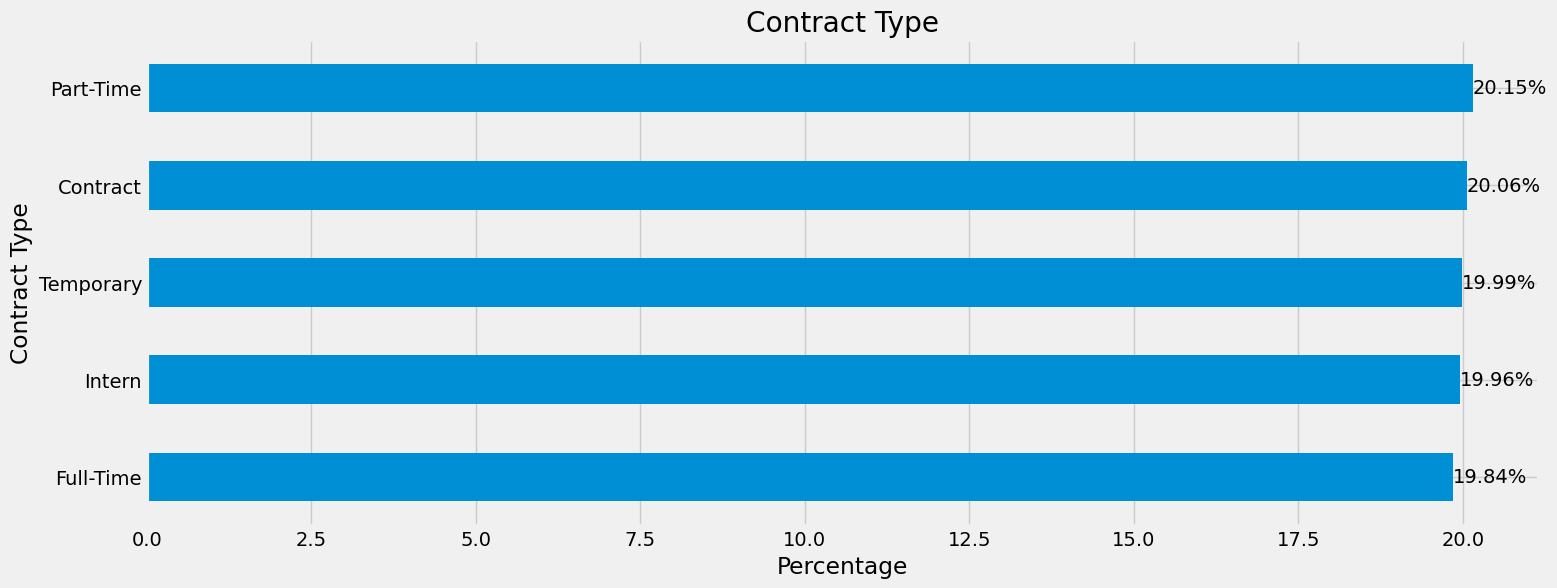

In [310]:
ax=(data['contract_type'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Contract Type')
plt.xlabel('Percentage')
plt.ylabel('Contract Type')
plt.show()

*There is a small percentage of full-time jobs compared to part-time jobs*

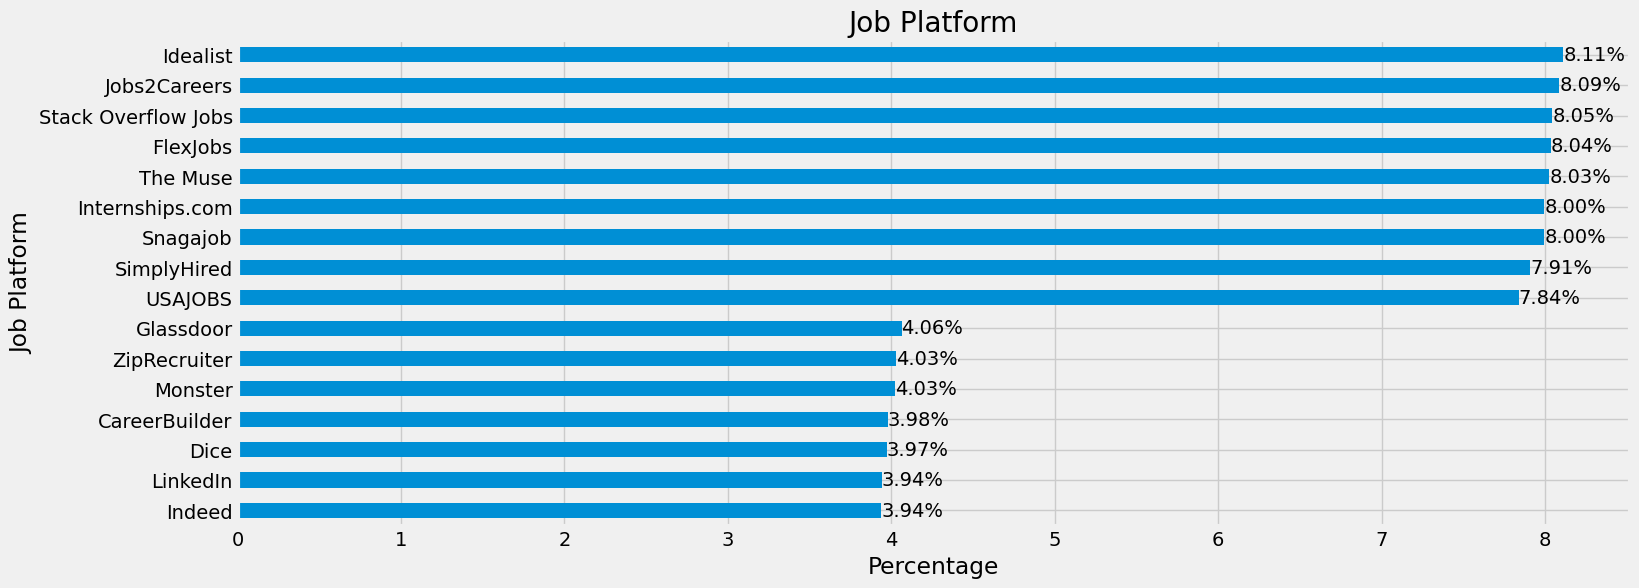

In [315]:
ax=(data['job_portal'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Job Platform')
plt.xlabel('Percentage')
plt.ylabel('Job Platform')
plt.show()

*Idealist and Jobs2Careers have the highest number of Job Postings*

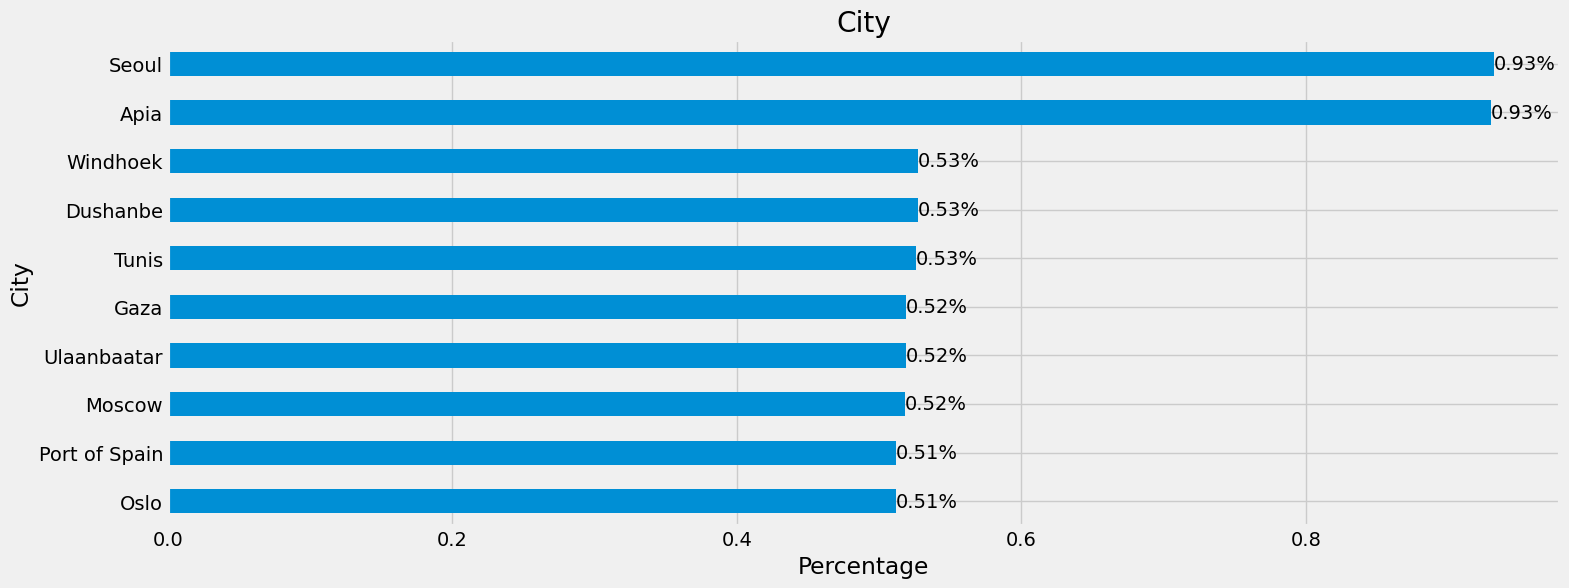

In [313]:
ax=(data['city'].value_counts(normalize=True).iloc[:10]*100).sort_values().plot(kind='barh',figsize=(16,6))
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('City')
plt.xlabel('Percentage')
plt.ylabel('City')
plt.show()

*Both Seoul and Apia are greatly distributed in terms of Job Postings*

*Correlation*

In [327]:
data[['experience','salary','company_size']].corr()

,experience,salary,company_size
experience,1.000000,-0.004449,-0.003398
salary,-0.004449,1.000000,-0.002971
company_size,-0.003398,-0.002971,1.000000


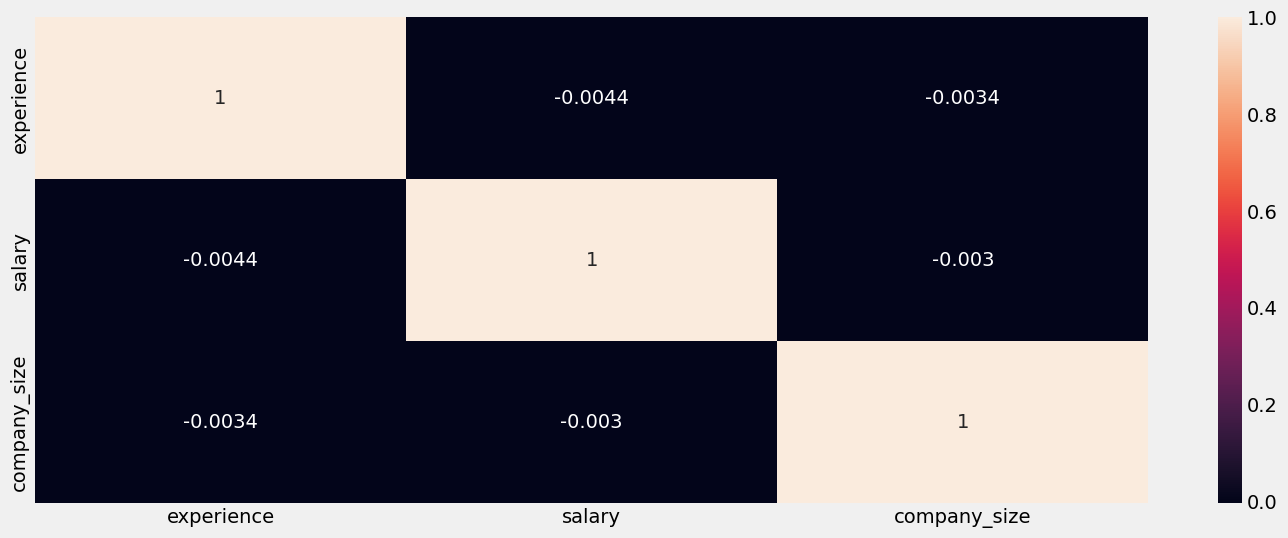

In [330]:
plt.figure(figsize=(16,6))
sns.heatmap(data[['experience','salary','company_size']].corr(),annot=True)
plt.show()

In [328]:
from scipy.stats import pearsonr
pearsonr(data['experience'],data['salary'])

PearsonRResult(statistic=-0.004449362603759743, pvalue=0.1594269818744482)

*Since p-value is greater than 0.1, there is no relationship between Experience and Salary*

In [329]:
from scipy.stats import pearsonr
pearsonr(data['company_size'],data['salary'])

PearsonRResult(statistic=-0.002970909658757756, pvalue=0.3474872022722314)

*Since p-value is greater than 0.1, there is no relationship between Company Size and Salary*

***Exploring Binary & Categorical Data***

*i) Contigency Table*

In [339]:
contigency_table=pd.pivot_table(data=data,index='job_title',columns=['preference'],values='salary',aggfunc=['max','min','mean','median'])

In [340]:
contigency_table.iloc[:10]

max                        min           \
preference                   Both   Female     Male     Both   Female   
job_title                                                               
Account Director          96000.0  97000.0  96500.0  68000.0  68500.0   
Account Executive         97000.0  96500.0  97500.0  67500.0  67500.0   
Account Manager           97000.0  97000.0  97000.0  68500.0  68000.0   
Accountant                97000.0  97000.0  97500.0  69000.0  67500.0   
Administrative Assistant  97000.0  97000.0  97000.0  68000.0  68000.0   
Aerospace Engineer        96500.0  97000.0  97500.0  67500.0  68000.0   
Architect                 96500.0  97500.0  97000.0  68000.0  68000.0   
Architectural Designer    97500.0  96000.0  96000.0  70000.0  67500.0   
Art Director              97000.0  97000.0  97000.0  67500.0  68000.0   
Art Teacher               96500.0  97000.0  97000.0  68000.0  67500.0   

                                           mean                              \
preference                   Male          Both        Female          Male   
job_title                                                                     
Account Director          67500.0  82388.888889  83373.333333  82431.506849   
Account Executive         67500.0  81853.211009  82623.786408  82492.822967   
Account Manager           67500.0  82889.090909  81978.647687  81878.640777   
Accountant                67500.0  82907.172996  83413.875598  82459.330144   
Administrative Assistant  68000.0  82165.191740  82913.165266  82957.783641   
Aerospace Engineer        67500.0  82188.596491  82475.225225  82192.607004   
Architect                 68500.0  81914.855072  83227.739726  82926.739927   
Architectural Designer    68000.0  82828.125000  82338.129496  82915.540541   
Art Director              68500.0  83164.948454  83123.762376  82925.480769   
Art Teacher               68000.0  82589.641434  82485.416667  82707.943925   

                           median                    
preference                   Both   Female     Male  
job_title                                            
Account Director          82500.0  84000.0  83250.0  
Account Executive         81500.0  83000.0  82000.0  
Account Manager           83000.0  81500.0  81500.0  
Accountant                83000.0  84000.0  83000.0  
Administrative Assistant  82500.0  83000.0  83000.0  
Aerospace Engineer        82500.0  83250.0  82500.0  
Architect                 81750.0  83000.0  83000.0  
Architectural Designer    82500.0  82500.0  83500.0  
Art Director              84000.0  82750.0  83750.0  
Art Teacher               82500.0  82000.0  82000.0

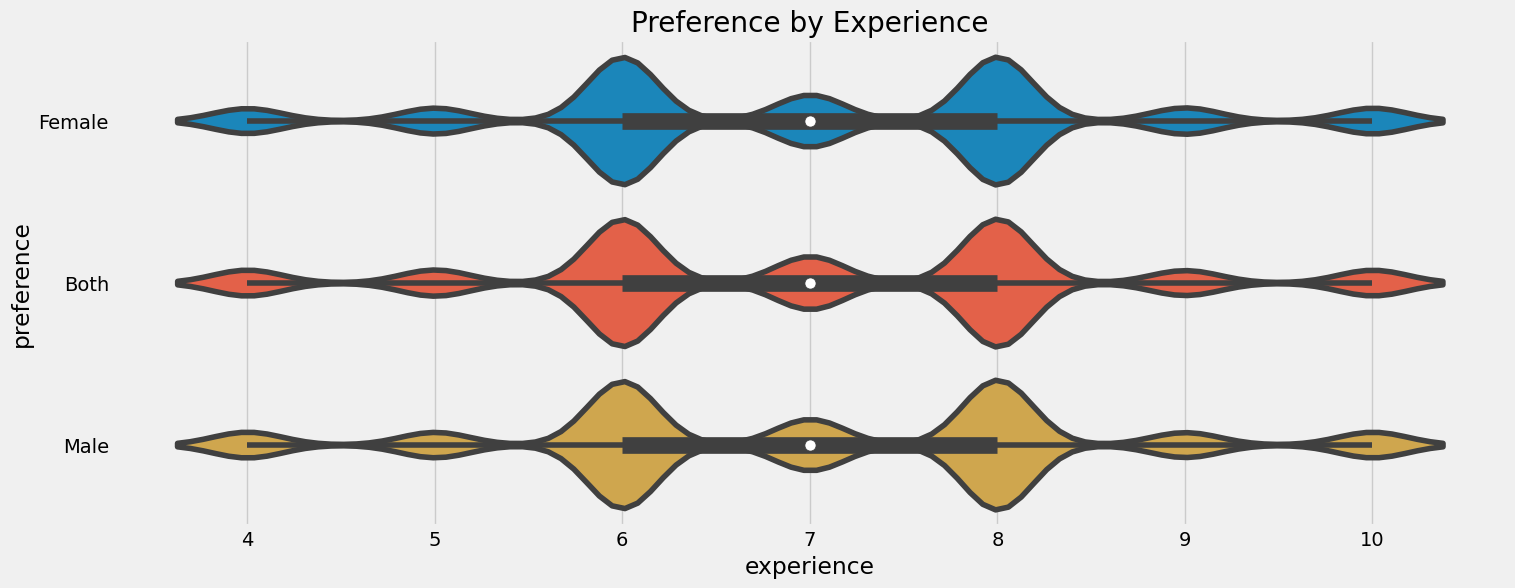

In [344]:
plt.figure(figsize=(16,6))
sns.violinplot(x=data['experience'],y=data['preference'])
plt.title('Preference by Experience')
plt.show()

*As expected, all the preferences have the same experience ranges since the data was generated randomly i.e it is a fake dataset*

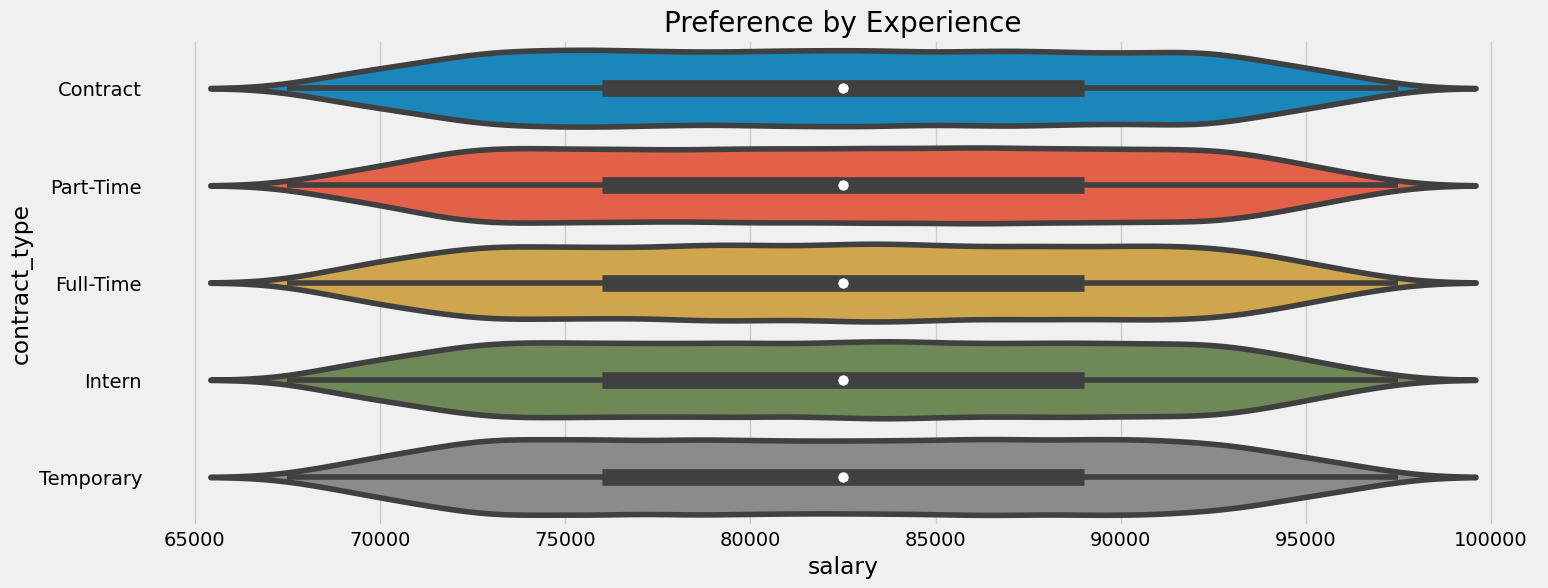

In [349]:
plt.figure(figsize=(16,6))
sns.violinplot(x=data['salary'],y=data['contract_type'])
plt.title('Preference by Experience')
plt.show()

*All contract types seem to have the same salary ranges, this is expected since the data was generated by the python faker library*

In [345]:
data.iloc[:2]

,job_title,experience,qualifications,salary,role,job_description,skills,preference,contract_type,benefits,responsibilities,company,company_size,country,city,job_portal,job_posting_date
0,Network Engineer,8.0,MBA,75000.0,Network Administrator,Network Administrators manage an organizations...,Network management Troubleshooting Network sec...,Female,Contract,"Health Insurance, Retirement Plans, Flexible W...","Manage and maintain computer networks, trouble...",China Evergrande Group,123882,Angola,Luanda,Idealist,2023-04-03
1,Purchasing Agent,9.0,M.Com,78500.0,Inventory Manager,An Inventory Manager oversees inventory levels...,Inventory control Demand forecasting Supply ch...,Female,Part-Time,"Employee Referral Programs, Financial Counseli...","Manage inventory levels, track stock, and opti...",Metro AG,86717,"Hong Kong SAR, China",City of Victoria,Indeed,2023-08-08
